# DSDBAL ASSIGNMENT NO. 6 
## Data Visualization III

## 1. Importing all the required Python Libraries.

In [123]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Loading the Dataset into pandas’ data frame.

In [124]:
df=pd.read_csv('iris.csv',index_col="Id")

In [125]:
df.shape

(150, 5)

In [126]:
df.describe(include="all")

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


Findings :

3 unique species: (Iris-setosa, Iris-versicolor, Iris-virginica)

Iris-setosa appears most frequently: 50 out of 150 observations

Petal lengths range widely from 1.0 cm to 6.9 cm, likely reflecting differences across species.

Sepal widths are fairly consistent, ranging from 2.0 cm to 4.4 cm, with most between 2.8 cm and 3.3 cm.

In [127]:
df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [128]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [129]:
# print(df['Species'].unique(),end="")

In [130]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Applying Outlier Analysis

### 1.Boxplot

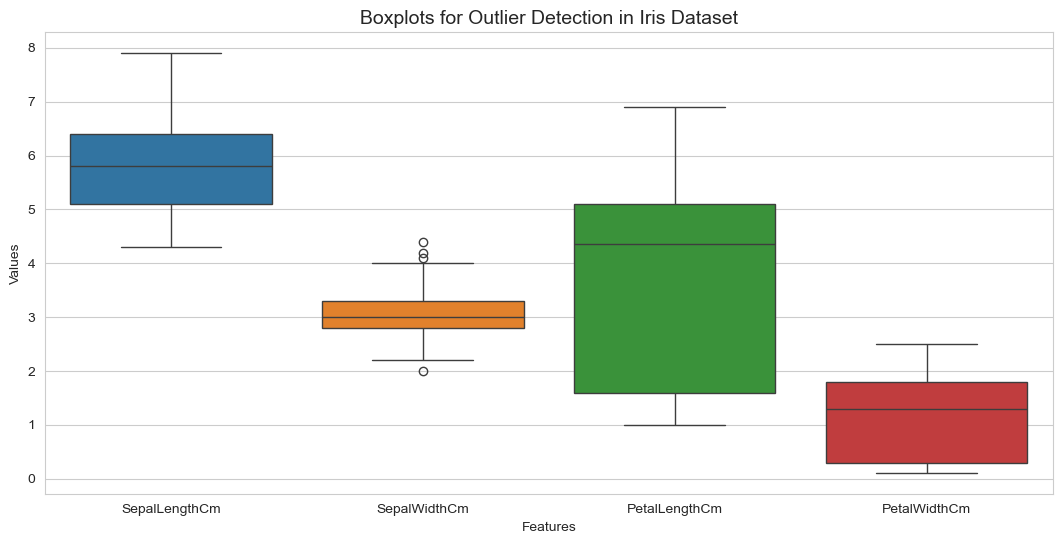

In [131]:

plt.figure(figsize=(13, 6))
sns.boxplot(df)
plt.title("Boxplots for Outlier Detection in Iris Dataset", fontsize=14)
plt.xlabel("Features")
plt.ylabel("Values")
plt.show()

Observations

Sepal Width (SepalWidthCm) :

Outliers detected: There are multiple outliers above Q3 and below Q1.

Lower Outliers: Some flowers have an unusually small sepal width.

Upper Outliers: Some flowers have wider sepals than expected.

This might suggest species variation or measurement errors.


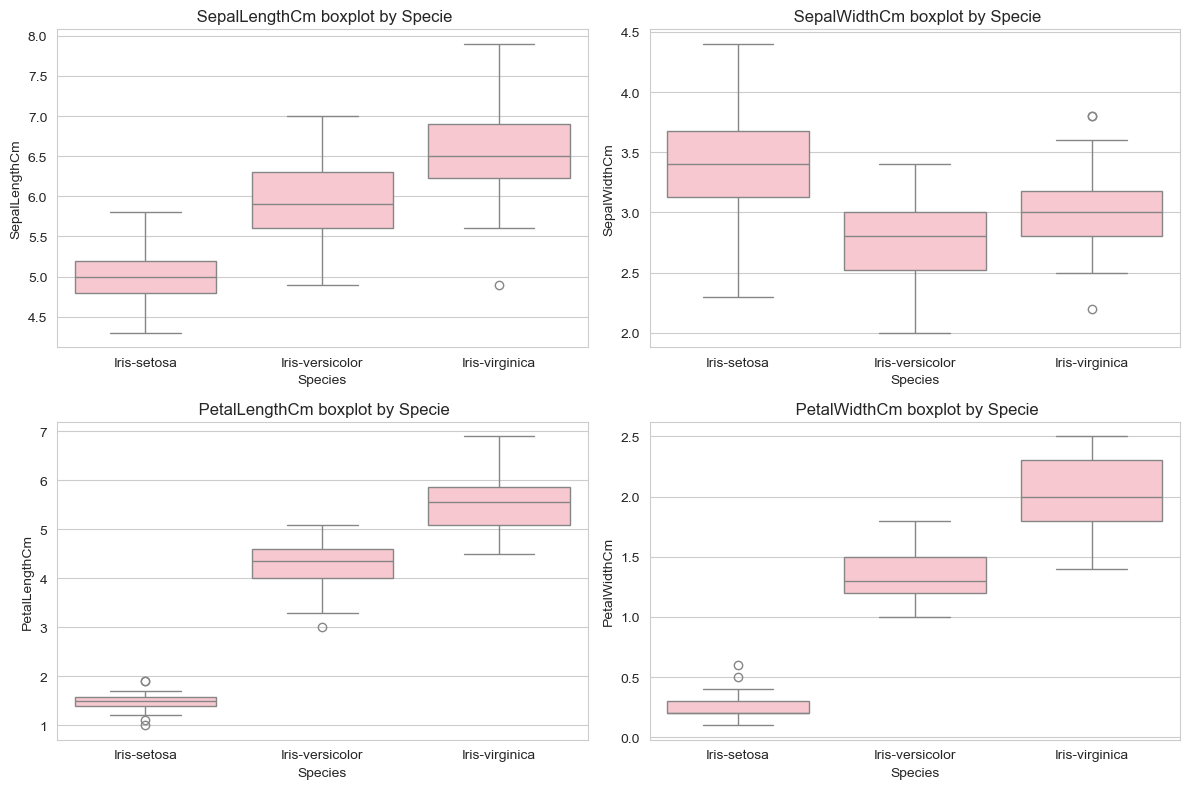

In [133]:
numerical_features = df.select_dtypes(include=['float64'])

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Species', y=col, data=df,color='pink')
    plt.title(f" {col} boxplot by Specie")

plt.tight_layout()
plt.show()

### Histogram 
### Distribution of each feature

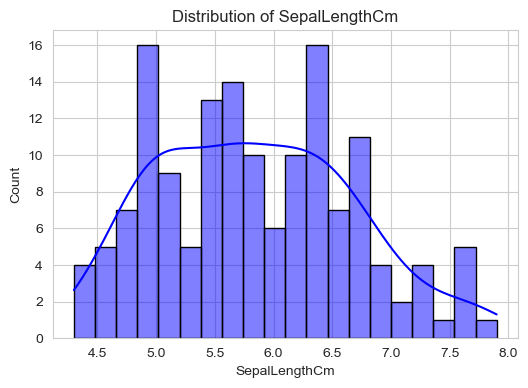

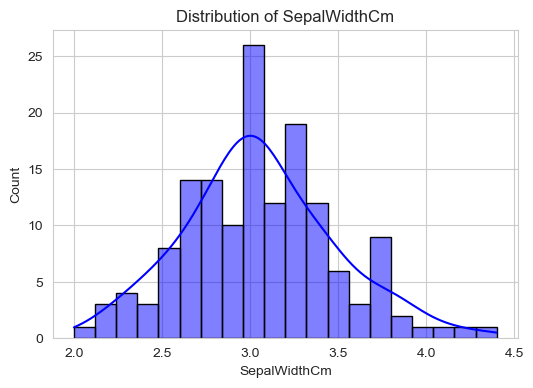

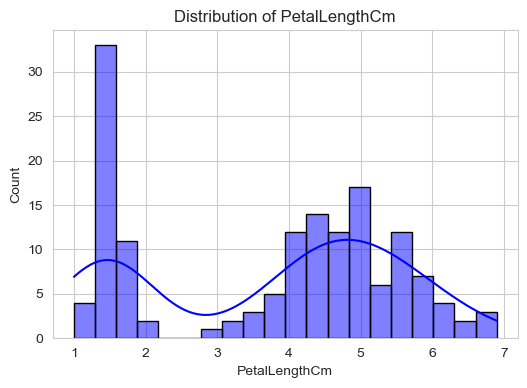

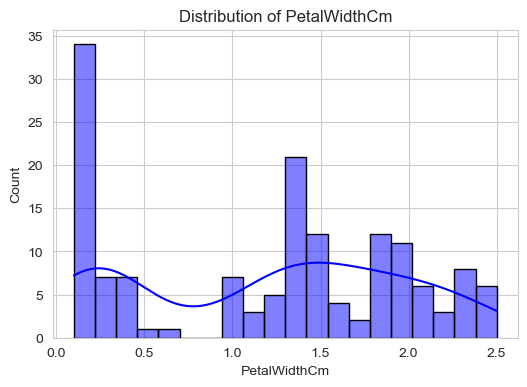

In [134]:

features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

for feature in features:
    plt.figure(figsize=(6, 4)) 
    sns.histplot(df[feature], bins=20, kde=True, color='blue', edgecolor='black')
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.show()


### Specie Wise Histogram

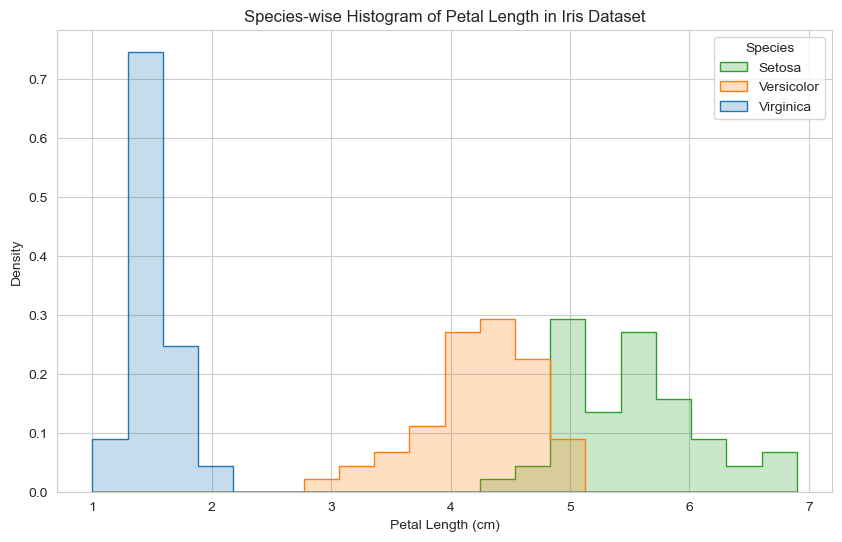

In [135]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='PetalLengthCm', hue='Species',bins=20, element='step', stat="density")

plt.xlabel('Petal Length (cm)')
plt.ylabel('Density')
plt.title('Species-wise Histogram of Petal Length in Iris Dataset')

plt.legend(title='Species', labels=['Setosa', 'Versicolor', 'Virginica'])
plt.show()


Observation:

Setosa has the least variation, with all values tightly packed between 1.0 - 2.0 cm.
    
Versicolor and Virginica have wider distributions, indicating more variability in petal length.

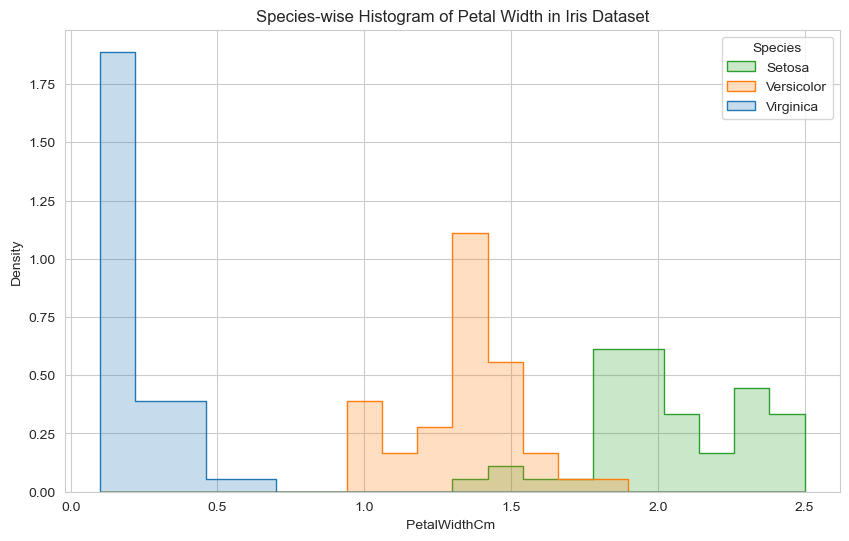

In [136]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='PetalWidthCm', hue='Species',bins=20, element='step', stat="density")


plt.xlabel('PetalWidthCm ')
plt.ylabel('Density')
plt.title('Species-wise Histogram of Petal Width in Iris Dataset')

plt.legend(title='Species', labels=['Setosa', 'Versicolor', 'Virginica'])
plt.show()


Observation :

Setosa has the sharpest peak, indicating less variation in petal width.
    
Versicolor and Virginica show more spread, suggesting greater variability.

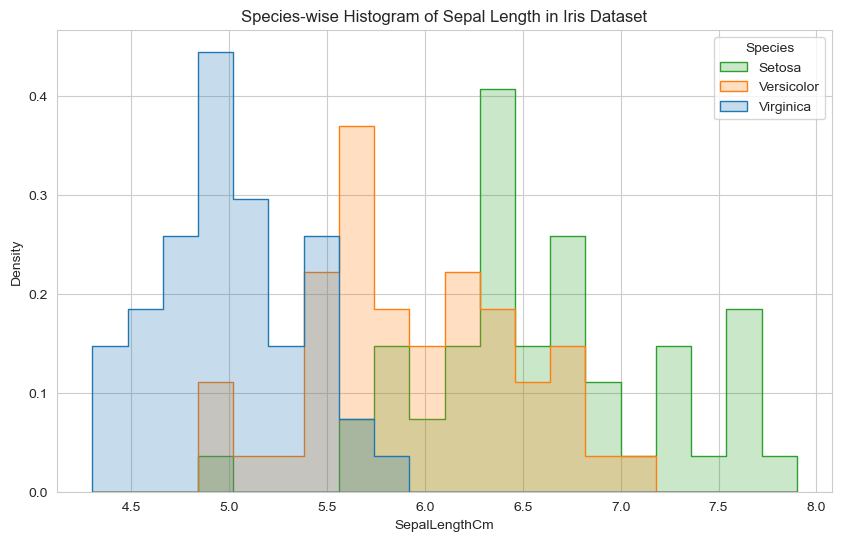

In [137]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='SepalLengthCm', hue='Species', bins=20, element='step', stat="density")


plt.xlabel('SepalLengthCm')
plt.ylabel('Density')
plt.title('Species-wise Histogram of Sepal Length in Iris Dataset')

plt.legend(title='Species', labels=['Setosa', 'Versicolor', 'Virginica'])

plt.show()


Observation:

Setosa has low variation 
 
While Versicolor and Virginica show greater variability in sepal length

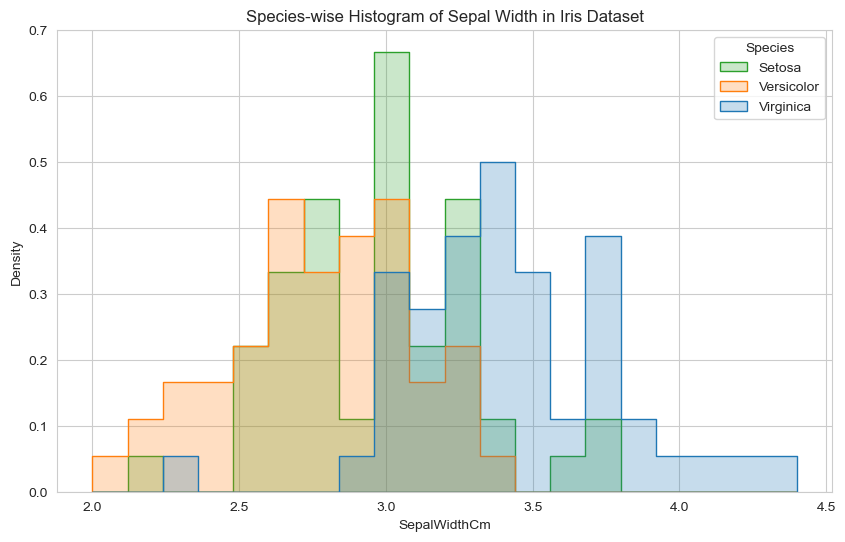

In [138]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='SepalWidthCm', hue='Species', bins=20, element='step', stat="density")

plt.xlabel('SepalWidthCm')
plt.ylabel('Density')
plt.title('Species-wise Histogram of Sepal Width in Iris Dataset')

plt.legend(title='Species', labels=['Setosa', 'Versicolor', 'Virginica'])

plt.show()


Observation :

Sepal Width is a useful distinguishing feature for Setosa but less so for Versicolor and Virginica due to their significant overlap.
    
There is more variation in Versicolor and Virginica, making it harder to separate them based on Sepal Width alone.